In [13]:
from matminer.data_retrieval.retrieve_MP import MPDataRetrieval
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifParser
import matminer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'
%matplotlib Inline

In [14]:
from pymatgen.io.cif import CifParser

mpr = MPRester("nb3XlTaW98NGIOTg")

material_ID = "mp-1207450"
structure = mpr.get_data(material_ID, data_type='', prop='cif').get("cif")

In [15]:
parser = CifParser.from_string(structure)

In [16]:
structure = parser.get_structures()
print(structure[0])

Full Formula (Zn18 Fe8)
Reduced Formula: Zn9Fe4
abc   :   7.773250   7.773250   7.773250
angles: 109.471221 109.471221 109.471221
Sites (26)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Fe    0.793479  0         0
  1  Fe    1         0.793479  1
  2  Fe    1         0         0.793479
  3  Fe    0.206521  0.206521  0.206521
  4  Fe    0.316661  0         0
  5  Fe    1         0.316661  1
  6  Fe    1         1         0.316661
  7  Fe    0.683339  0.683339  0.683339
  8  Zn    0.643763  0.248717  0
  9  Zn    0.248717  0.643763  1
 10  Zn    0.751283  0.751283  0.395046
 11  Zn    0.395046  0.751283  0.751283
 12  Zn    0.356237  0.356237  0.604954
 13  Zn    0.604954  0.356237  0.356237
 14  Zn    1         0.643763  0.248717
 15  Zn    1         0.248717  0.643763
 16  Zn    0.643763  0         0.248717
 17  Zn    0.356237  0.604954  0.356237
 18  Zn    0.751283  0.395046  0.751283
 19  Zn    0.248717  0         0.643763
 20  Zn    0         

In [17]:
Zn9Fe4 = structure[0]

print(Zn9Fe4.lattice)
print(Zn9Fe4.species)
print(Zn9Fe4.charge)
print(Zn9Fe4.cart_coords)
print(Zn9Fe4.atomic_numbers)

4.487888 4.487888 4.487888
4.487888 -4.487888 -4.487888
-4.487888 4.487888 -4.487888
[Element Fe, Element Fe, Element Fe, Element Fe, Element Fe, Element Fe, Element Fe, Element Fe, Element Zn, Element Zn, Element Zn, Element Zn, Element Zn, Element Zn, Element Zn, Element Zn, Element Zn, Element Zn, Element Zn, Element Zn, Element Zn, Element Zn, Element Zn, Element Zn, Element Zn, Element Zn]
0.0
[[ 3.56104488e+00  3.56104488e+00  3.56104488e+00]
 [ 3.56104488e+00  5.41473112e+00 -3.56104488e+00]
 [ 9.26843118e-01  8.04893288e+00  9.26843118e-01]
 [ 9.26843118e-01  9.26843118e-01 -9.26843118e-01]
 [ 1.42113910e+00  1.42113910e+00  1.42113910e+00]
 [ 1.42113910e+00  7.55463690e+00 -1.42113910e+00]
 [ 7.55463690e+00  1.42113910e+00 -1.42113910e+00]
 [ 3.06674890e+00  3.06674890e+00 -3.06674890e+00]
 [ 4.00535028e+00  1.77292220e+00  1.77292220e+00]
 [-4.82537718e-01  2.71496580e+00 -6.26081020e+00]
 [ 4.97042572e+00  1.77292220e+00 -1.77292220e+00]
 [ 1.77292220e+00  1.77292220e+00 -4.

In [19]:
Zn9Fe4.species

[Element Fe,
 Element Fe,
 Element Fe,
 Element Fe,
 Element Fe,
 Element Fe,
 Element Fe,
 Element Fe,
 Element Zn,
 Element Zn,
 Element Zn,
 Element Zn,
 Element Zn,
 Element Zn,
 Element Zn,
 Element Zn,
 Element Zn,
 Element Zn,
 Element Zn,
 Element Zn,
 Element Zn,
 Element Zn,
 Element Zn,
 Element Zn,
 Element Zn,
 Element Zn]

## Bandgap

In [6]:
results = mpr.query({"band_gap": {"$gt": 6}}, properties=["material_id"])

100%|███████████████████████████████████████████████████████████████████████████████| 845/845 [00:02<00:00, 367.71it/s]


## Descriptors

In [7]:
mean_atomic_number = np.mean(Zn9Fe4.atomic_numbers)
max_atomic_number = np.max(Zn9Fe4.atomic_numbers)
min_atomic_number = np.min(Zn9Fe4.atomic_numbers)
std_atomic_number = np.std(Zn9Fe4.atomic_numbers)

print(mean_atomic_number, max_atomic_number, min_atomic_number, std_atomic_number)

28.76923076923077 30 26 1.8461538461538463


In [8]:
mean_distance_matrix = np.mean(Zn9Fe4.distance_matrix)
max_distance_matrix = np.max(Zn9Fe4.distance_matrix)
min_distance_matrix = np.min(Zn9Fe4.distance_matrix)
std_distance_matrix = np.std(Zn9Fe4.distance_matrix)

print(mean_distance_matrix, max_distance_matrix, min_distance_matrix, std_distance_matrix)

3.34447258069263 4.681456073454327 0.0 1.0238412641887145


## Let's d the ABC3 thingy

In [9]:
results = mpr.query({"formula_anonymous": "ABC3"}, properties=["cif", "band_gap"])

100%|█████████████████████████████████████████████████████████████████████████████| 4358/4358 [00:15<00:00, 274.50it/s]


In [10]:
results

[{'cif': "# generated using pymatgen\ndata_AlPt3C\n_symmetry_space_group_name_H-M   'P 1'\n_cell_length_a   4.18515000\n_cell_length_b   4.18515000\n_cell_length_c   4.18515000\n_cell_angle_alpha   90.00000000\n_cell_angle_beta   90.00000000\n_cell_angle_gamma   90.00000000\n_symmetry_Int_Tables_number   1\n_chemical_formula_structural   AlPt3C\n_chemical_formula_sum   'Al1 Pt3 C1'\n_cell_volume   73.30491331\n_cell_formula_units_Z   1\nloop_\n _symmetry_equiv_pos_site_id\n _symmetry_equiv_pos_as_xyz\n  1  'x, y, z'\nloop_\n _atom_site_type_symbol\n _atom_site_label\n _atom_site_symmetry_multiplicity\n _atom_site_fract_x\n _atom_site_fract_y\n _atom_site_fract_z\n _atom_site_occupancy\n  Al  Al0  1  0.00000000  0.00000000  0.00000000  1\n  Pt  Pt1  1  0.00000000  0.50000000  0.50000000  1\n  Pt  Pt2  1  0.50000000  0.00000000  0.50000000  1\n  Pt  Pt3  1  0.50000000  0.50000000  0.00000000  1\n  C  C4  1  0.50000000  0.50000000  0.50000000  1\n",
  'band_gap': 0.0},
 {'cif': "# generat

In [11]:
mean_atomic_numbers = []
max_atomic_numbers = []
min_atomic_numbers = []
std_atomic_numbers = []

# Lattice parameters
a_parameters = []
b_parameters = []
c_parameters = []
alpha_parameters = []
beta_parameters = []
gamma_parameters = []

mean_distance_matrix = []
max_distance_matrix = []
min_distance_matrix = []
std_distance_matrix = []

band_gaps = []


print("a =", Zn9Fe4.lattice.abc[0], "b =", Zn9Fe4.lattice.abc[1], "c =", Zn9Fe4.lattice.abc[2])
print("alpha =", Zn9Fe4.lattice.angles[0], "b =", Zn9Fe4.lattice.angles[1], "c =", Zn9Fe4.lattice.angles[2])

a = 7.773250034678674 b = 7.773250034678672 c = 7.773250034678672
alpha = 109.47122063449069 b = 109.47122063449069 c = 109.47122063449069


In [14]:
Zn9Fe4.lattice

Lattice
    abc : 7.773250034678674 7.773250034678672 7.773250034678672
 angles : 109.47122063449069 109.47122063449069 109.47122063449069
 volume : 361.56469872202797
      A : 4.487888000000001 4.487888 4.487888000000001
      B : 4.487887999999999 -4.487888 -4.487888
      C : -4.487887999999999 4.487888 -4.487888

In [15]:
for r in results:
    cif = r['cif']
    bg = r['band_gap']
    parser = CifParser.from_string(cif)

    structure = parser.get_structures()
    structure = structure[0]

    mean_atomic_numbers += [np.mean(structure.atomic_numbers)]
    max_atomic_numbers += [np.max(structure.atomic_numbers)]
    min_atomic_numbers += [np.min(structure.atomic_numbers)]
    std_atomic_numbers += [np.std(structure.atomic_numbers)]

    # Lattice parameters:
    a_parameters += [structure.lattice.abc[0]]
    b_parameters += [structure.lattice.abc[1]]
    c_parameters += [structure.lattice.abc[2]]
    alpha_parameters += [structure.lattice.angles[0]]
    beta_parameters += [structure.lattice.angles[1]]
    gamma_parameters += [structure.lattice.angles[2]]

    mean_distance_matrix += [np.mean(structure.distance_matrix)]
    max_distance_matrix += [np.max(structure.distance_matrix)]
    min_distance_matrix += [np.min(structure.distance_matrix)]
    std_distance_matrix += [np.std(structure.distance_matrix)]

    band_gaps += [bg]

C:\Users\user\miniconda3\lib\site-packages\pymatgen\io\cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


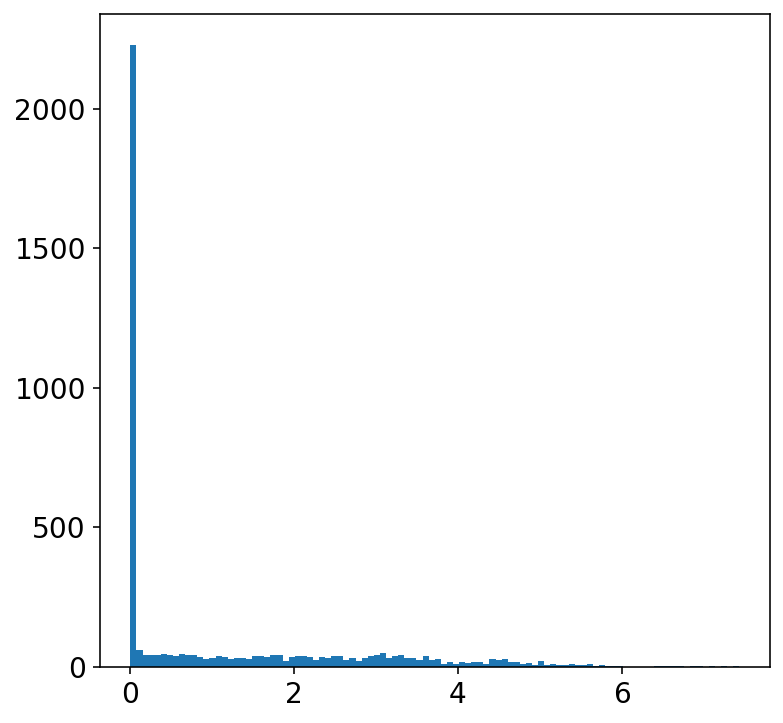

In [17]:
plt.rcParams.update({"font.size": 14})

plt.figure(figsize=(6, 6))
plt.hist(band_gaps, bins=100)
plt.show();

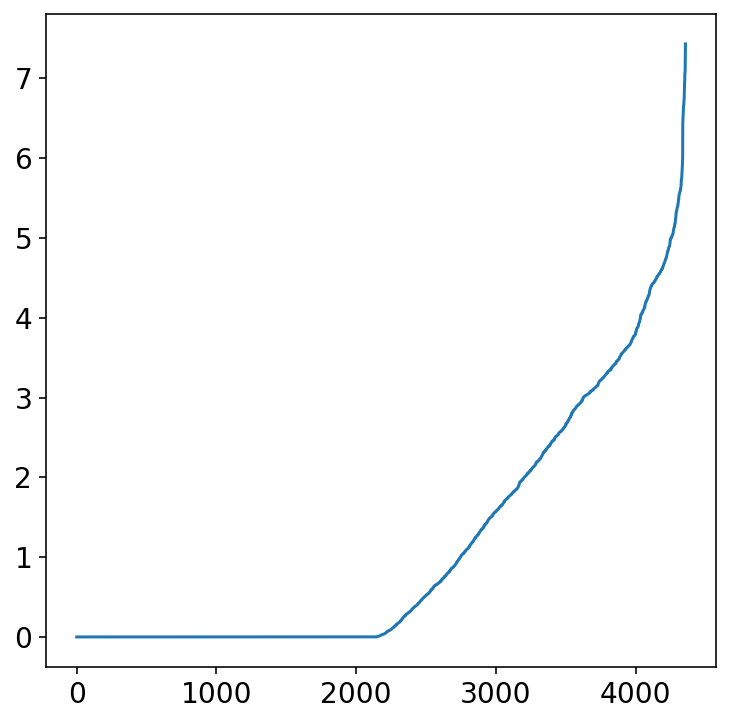

In [18]:
bandgaps_sorted = sorted(band_gaps)

plt.figure(figsize=(6, 6))
plt.plot(bandgaps_sorted)
plt.show();

In [23]:
from sklearn.preprocessing import StandardScaler

dataset_df = pd.DataFrame({
    "mean_atomic_numbers": mean_atomic_numbers,
    "max_atomic_numbers": max_atomic_numbers,
    "min_atomic_numbers": min_atomic_numbers,
    "std_atomic_numbers": std_atomic_numbers,
    "a_parameters": a_parameters,
    "b_parameters": b_parameters,
    "c_parameters": c_parameters,
    "alpha_parameters": alpha_parameters,
    "beta_parameters": beta_parameters,
    "gamma_parameters": gamma_parameters,
    "mean_distance_matrix": mean_distance_matrix,
    "max_distance_matrix": max_distance_matrix,
    "min_distance_matrix": min_distance_matrix,
    "std_distance_matrix": std_distance_matrix
})

dataset_df.head()

,mean_atomic_numbers,max_atomic_numbers,min_atomic_numbers,std_atomic_numbers,a_parameters,b_parameters,c_parameters,alpha_parameters,beta_parameters,gamma_parameters,mean_distance_matrix,max_distance_matrix,min_distance_matrix,std_distance_matrix
0,50.6,78,6,33.630938,4.185150,4.185150,4.185150,90.000000,90.000000,90.000000,2.212661,3.624446,0.0,1.187310
1,48.4,82,1,26.226704,6.244213,6.244213,6.244213,90.000000,90.000000,90.000000,3.301273,5.407647,0.0,1.771458
2,41.8,66,5,19.963968,4.319571,4.319571,4.319571,90.000000,90.000000,90.000000,2.283728,3.740858,0.0,1.225445
3,22.6,63,8,21.369137,5.494448,5.522427,5.522427,60.490967,60.167456,60.167456,2.370456,3.900285,0.0,0.926438
4,40.8,83,7,24.276738,6.230000,6.230000,6.230000,90.000000,90.000000,90.000000,3.293759,5.395338,0.0,1.767426


In [24]:
scaler = StandardScaler().fit(dataset_df)

scaled_dataset_df = scaler.transform(dataset_df)

In [25]:
from sklearn.model_selection import train_test_split

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(scaled_dataset_df, band_gaps, 
                                                                  test_size=0.2, random_state=None)

C:\Users\user\miniconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


RF MSE	1.3703765635448832

RF R2	0.5055809772069584

[11:28:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
XGBOOST MSE	1.2880021113870617

XGBOOST R2	0.5353009076424502



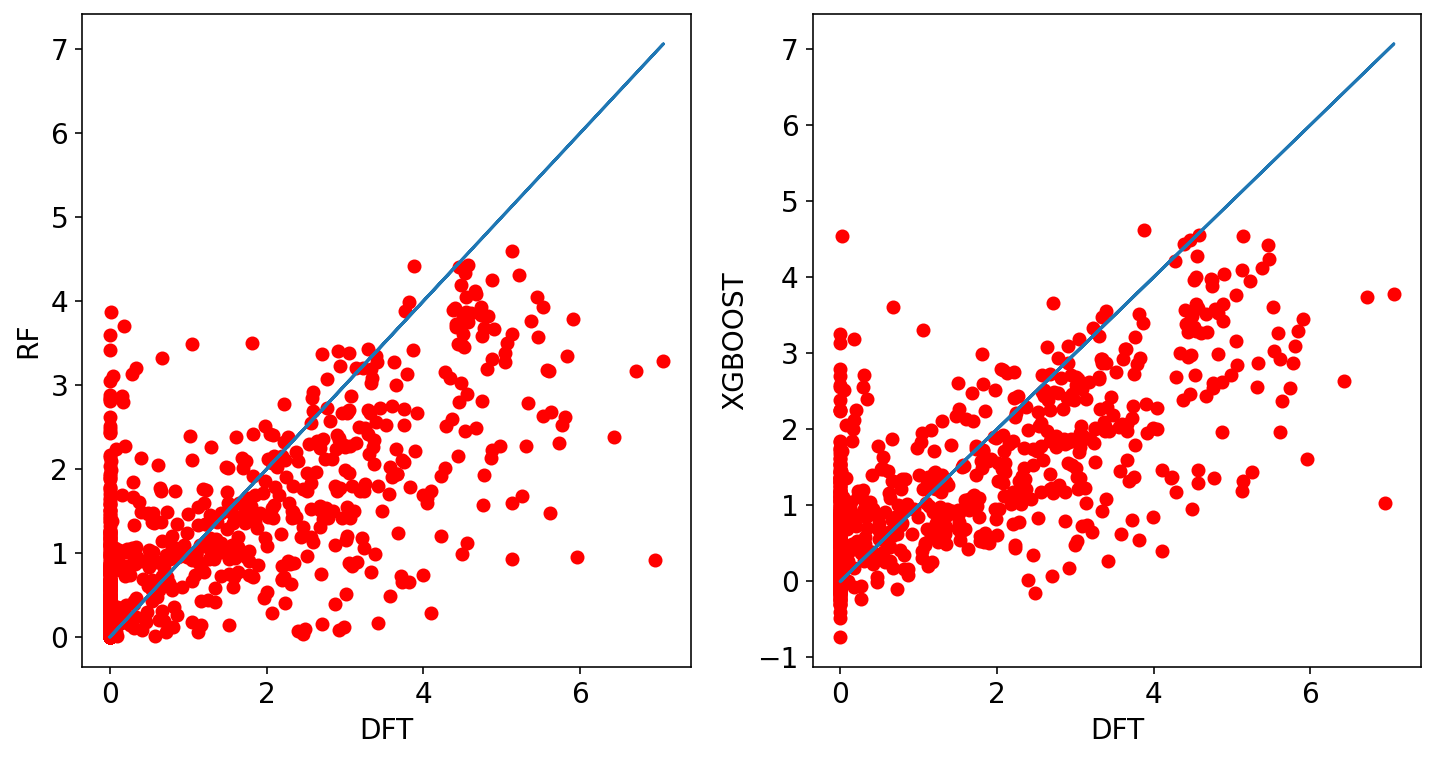

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=400, max_depth=400, random_state=0)
regr.fit(X_train_scaled, y_train)
y_predicted = regr.predict(X_test_scaled)

print('RF MSE\t'+str(mean_squared_error(y_test, y_predicted))+'\n')
print('RF R2\t'+str(r2_score(y_test, y_predicted))+'\n')

xPlot=y_test
yPlot=y_predicted


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('RF')
plt.xlabel('DFT')


regr = XGBRegressor(objective='reg:linear', colsample_bytree=0.3, learning_rate=0.1,
                    max_depth=400, alpha=10, n_estimators=400)
regr.fit(X_train_scaled, y_train)
y_predicted = regr.predict(X_test_scaled)

print('XGBOOST MSE\t'+str(mean_squared_error(y_test, y_predicted))+'\n')
print('XGBOOST R2\t'+str(r2_score(y_test, y_predicted))+'\n')


xPlot=y_test
yPlot=y_predicted

plt.subplot(1, 2, 2)
# plt.figure(figsize=(6,6))
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('XGBOOST')
plt.xlabel('DFT')
plt.show();

That doesn't look very impressive. The MLs are quite struggling with the metals. OK, let's redo this exercise and remove the metals.

In [27]:
mean_atomic_numbers = []
max_atomic_numbers = []
min_atomic_numbers = []
std_atomic_numbers = []
a_parameters = []
b_parameters = []
c_parameters = []
alpha_parameters = []
beta_parameters = []
gamma_parameters = []
mean_distance_matrix = []
max_distance_matrix = []
min_distance_matrix = []
std_distance_matrix = []
band_gaps = []

for r in results:
    cif = r['cif']
    bg = r['band_gap']
    if bg > 1 and bg < 6:
        parser = CifParser.from_string(cif)
        structure = parser.get_structures()
        structure = structure[0]

        mean_atomic_numbers += [np.mean(structure.atomic_numbers)]
        max_atomic_numbers += [np.max(structure.atomic_numbers)]
        min_atomic_numbers += [np.min(structure.atomic_numbers)]
        std_atomic_numbers += [np.std(structure.atomic_numbers)]

        # Lattice parameters:
        a_parameters += [structure.lattice.abc[0]]
        b_parameters += [structure.lattice.abc[1]]
        c_parameters += [structure.lattice.abc[2]]
        alpha_parameters += [structure.lattice.angles[0]]
        beta_parameters += [structure.lattice.angles[1]]
        gamma_parameters += [structure.lattice.angles[2]]

        mean_distance_matrix += [np.mean(structure.distance_matrix)]
        max_distance_matrix += [np.max(structure.distance_matrix)]
        min_distance_matrix += [np.min(structure.distance_matrix)]
        std_distance_matrix += [np.std(structure.distance_matrix)]

        band_gaps += [bg]

C:\Users\user\miniconda3\lib\site-packages\pymatgen\io\cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


In [28]:
# How many do we have now?
len(band_gaps)

1589

RF MSE	0.6336064562733053

RF R2	0.5244038257253738

[17:08:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
XGBOOST MSE	0.6033960471126362

XGBOOST R2	0.5470802913418916



Text(0.5, 0, 'DFT')

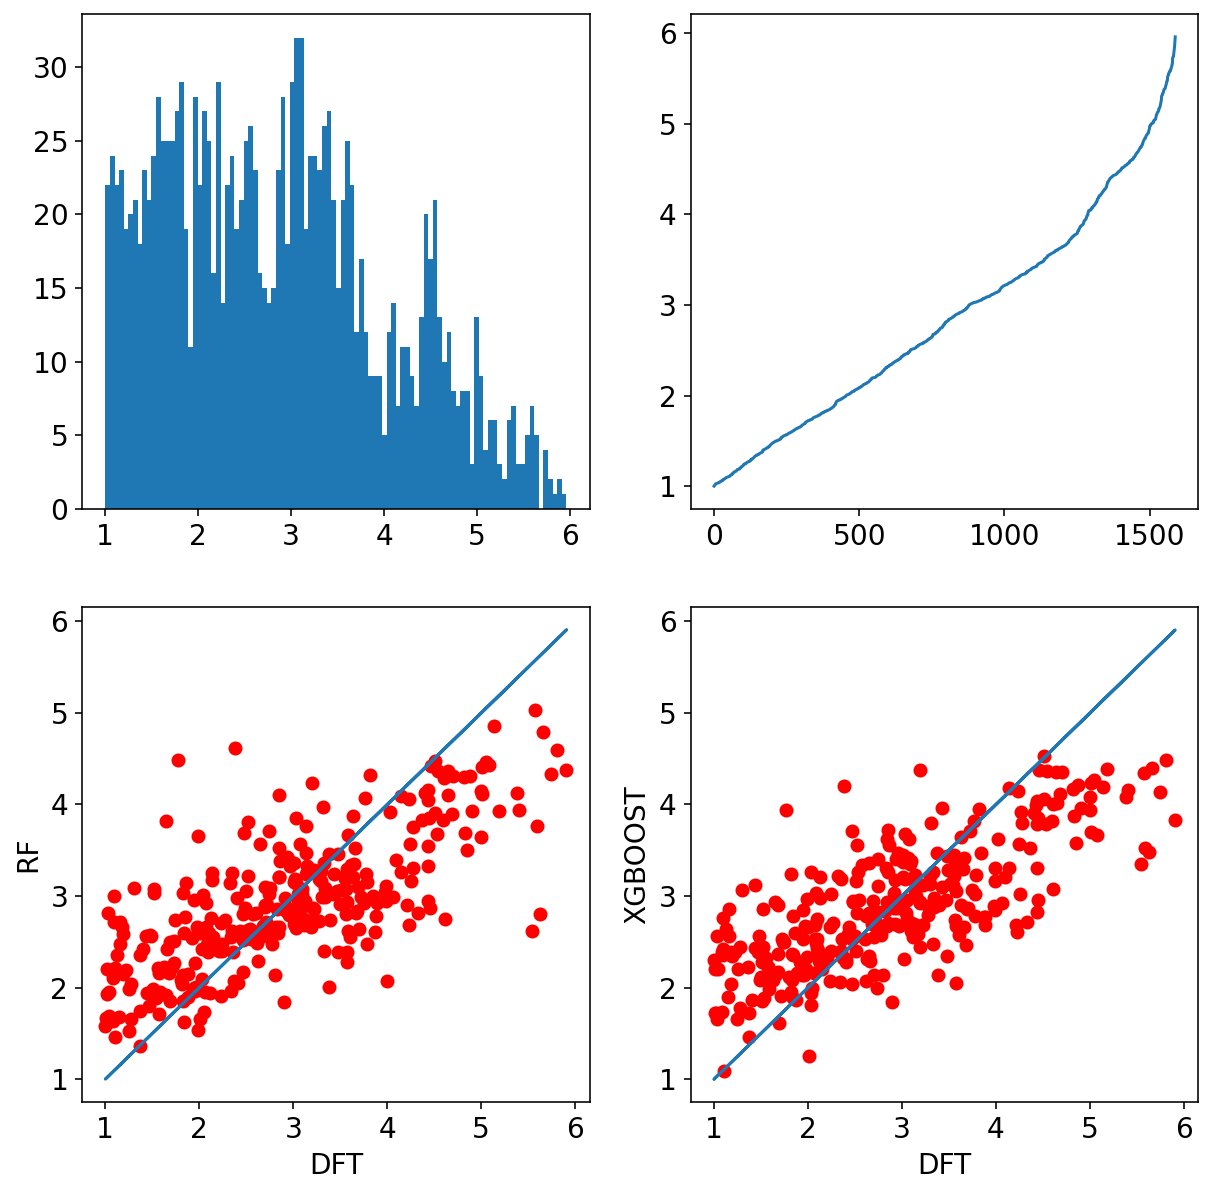

In [68]:
# Data visualization: let's have a look at our data.


plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.hist(band_gaps, bins=100)
# plt.savefig('Histogram_PDF_NoMetals', bbox_inches='tight')

band_gaps_sorted=sorted(band_gaps)

# Scatter plot
plt.subplot(2, 2, 2)
plt.plot(band_gaps_sorted)
plt.ylabel('')
plt.xlabel('')
# plt.savefig('ScatterPlot_NoMetals', bbox_inches='tight')



# This histogram shows that almost half of our data are metals (zero bandgap).

# Next, we create a pandas DataFrame object

dataset_df = pd.DataFrame({"mean_atomic_numbers": mean_atomic_numbers,
                           "max_atomic_numbers": max_atomic_numbers,
                           "min_atomic_numbers": min_atomic_numbers,
                           "std_atomic_numbers": std_atomic_numbers,
                           "a_parameters": a_parameters,
                           "b_parameters": b_parameters,
                           "c_parameters": c_parameters,
                           "alpha_parameters": alpha_parameters,
                           "beta_parameters": beta_parameters,
                           "gamma_parameters": gamma_parameters,
                           "mean_distance_matrix": mean_distance_matrix,
                           "max_distance_matrix": max_distance_matrix,
                           "min_distance_matrix": min_distance_matrix,
                           "std_distance_matrix": std_distance_matrix
                           })

# We need to normalize the data using a scaler

# Define the scaler
scaler = StandardScaler().fit(dataset_df)

# Scale the train set
scaled_dataset_df = scaler.transform(dataset_df)
# Then we do a 80/20 split of data: training set and test set

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    scaled_dataset_df, band_gaps, test_size=.2, random_state=None)

# It's machine learning time!

regr = RandomForestRegressor(n_estimators=400, max_depth=400, random_state=0)
regr.fit(X_train_scaled, y_train)
y_predicted = regr.predict(X_test_scaled)

print('RF MSE\t'+str(mean_squared_error(y_test, y_predicted))+'\n')
print('RF R2\t'+str(r2_score(y_test, y_predicted))+'\n')

xPlot=y_test
yPlot=y_predicted
plt.subplot(2, 2, 3)
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('RF')
plt.xlabel('DFT')
# plt.savefig('RF_Correlation_Test', bbox_inches='tight')


regr = XGBRegressor(objective='reg:linear', colsample_bytree=0.3, learning_rate=0.1,
                    max_depth=400, alpha=10, n_estimators=400)
regr.fit(X_train_scaled, y_train)
y_predicted = regr.predict(X_test_scaled)

print('XGBOOST MSE\t'+str(mean_squared_error(y_test, y_predicted))+'\n')
print('XGBOOST R2\t'+str(r2_score(y_test, y_predicted))+'\n')


xPlot=y_test
yPlot=y_predicted
plt.subplot(2, 2, 4)
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('XGBOOST')
plt.xlabel('DFT')
# plt.savefig('XGBOOST_Correlation_Test', bbox_inches='tight')

## Let's make it advance

In [8]:
from pymatgen.io.cif import CifParser
from urllib.request import urlopen
import pandas as pd
from pymatgen.ext.matproj import MPRester
from pymatgen.ext.matproj import MPRestError
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

In [25]:
m = MPRester("nb3XlTaW98NGIOTg")
results = m.query({"formula_anonymous": "ABC"}, properties=["cif", "band_gap"])
# results = m.query({"elements":{"$all": ["O"]},"band_gap": {"$gt": 1}}, properties=["cif", "band_gap"])

100%|█████████████████████████████████████████████████████████████████████████████| 4297/4297 [00:12<00:00, 336.54it/s]


In [26]:
results

[{'cif': "# generated using pymatgen\ndata_CeZnIn\n_symmetry_space_group_name_H-M   'P 1'\n_cell_length_a   4.78309544\n_cell_length_b   4.78309544\n_cell_length_c   7.37412500\n_cell_angle_alpha   90.00000000\n_cell_angle_beta   90.00000000\n_cell_angle_gamma   119.99999228\n_symmetry_Int_Tables_number   1\n_chemical_formula_structural   CeZnIn\n_chemical_formula_sum   'Ce2 Zn2 In2'\n_cell_volume   146.10304061\n_cell_formula_units_Z   2\nloop_\n _symmetry_equiv_pos_site_id\n _symmetry_equiv_pos_as_xyz\n  1  'x, y, z'\nloop_\n _atom_site_type_symbol\n _atom_site_label\n _atom_site_symmetry_multiplicity\n _atom_site_fract_x\n _atom_site_fract_y\n _atom_site_fract_z\n _atom_site_occupancy\n  Ce  Ce0  1  0.00000000  0.00000000  0.00000000  1\n  Ce  Ce1  1  0.00000000  0.00000000  0.50000000  1\n  Zn  Zn2  1  0.33333300  0.66666700  0.75000000  1\n  Zn  Zn3  1  0.66666700  0.33333300  0.25000000  1\n  In  In4  1  0.33333300  0.66666700  0.25000000  1\n  In  In5  1  0.66666700  0.33333300 

In [31]:
atomic_numbers = []
a_parameters = []
b_parameters = []
c_parameters = []
alpha_parameters = []
beta_parameters = []
gamma_parameters = []
distance_matrix = []
band_gaps = []
van_der_waals_radius = []
electrical_resistivity = []
velocity_of_sound = []
reflectivity = []
poissons_ratio = []
molar_volume = []
thermal_conductivity = []
melting_point = []
critical_temperature = []
superconduction_temperature = []
liquid_range = []
bulk_modulus = []
youngs_modulus = []
brinell_hardness = []
rigidity_modulus = []
vickers_hardness = []
density_of_solid = []
coefficient_of_linear_thermal_expansion = []
average_ionic_radius = []
average_cationic_radius = []
average_anionic_radius = []

imp = SimpleImputer(missing_values=None, strategy='constant',fill_value=0)

In [32]:
for r in results:
    cif = r['cif']
    bg = r['band_gap']
    if bg > 0.1:
        parser = CifParser.from_string(cif)

        structure = parser.get_structures()
        structure = structure[0]

        numElements = len(structure.atomic_numbers)

        atomic_numbers += [[np.mean(structure.atomic_numbers),np.max(structure.atomic_numbers),
                            np.min(structure.atomic_numbers),np.std(structure.atomic_numbers)]]

        # Lattice parameters:
        a_parameters += [structure.lattice.abc[0]]
        b_parameters += [structure.lattice.abc[1]]
        c_parameters += [structure.lattice.abc[2]]
        alpha_parameters += [structure.lattice.angles[0]]
        beta_parameters += [structure.lattice.angles[1]]
        gamma_parameters += [structure.lattice.angles[2]]

        distance_matrix += [[np.mean(structure.distance_matrix),np.max(structure.distance_matrix),
                             np.min(structure.distance_matrix),np.std(structure.distance_matrix)]]

        e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15,e16,e17,e18,e19,e20,e21,e22,e23=[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
        for e in structure.species:
            e1 +=[e.van_der_waals_radius]
            e2 +=[e.electrical_resistivity]
            e3 +=[e.velocity_of_sound]
            e4 +=[e.reflectivity]
            e6 +=[e.poissons_ratio]
            e7 +=[e.molar_volume]
            e8 +=[e.thermal_conductivity]
            e9 +=[e.melting_point]
            e10 +=[e.critical_temperature ]
            e11 +=[e.superconduction_temperature ]
            e12 +=[e.liquid_range ]
            e13 +=[e.bulk_modulus ]
            e14 +=[e.youngs_modulus ]
            e15 +=[e.brinell_hardness ]
            e16 +=[e.rigidity_modulus ]
            # e17 +=[e.mineral_hardness ]
            e18 +=[e.vickers_hardness ]
            e19 +=[e.density_of_solid ]
            e20 +=[e.coefficient_of_linear_thermal_expansion ]
            e21 +=[e.average_ionic_radius ]
            e22 +=[e.average_cationic_radius ]
            e23 +=[e.average_anionic_radius ]

        e1=[0 if v is None else v for v in e1]
        e2=[0 if v is None else v for v in e2]
        e3=[0 if v is None else v for v in e3]
        e4=[0 if v is None else v for v in e4]
        # e5=[0 if v is None else v for v in e5]
        e6=[0 if v is None else v for v in e6]
        e7=[0 if v is None else v for v in e7]
        e8=[0 if v is None else v for v in e8]
        e9=[0 if v is None else v for v in e9]
        e10=[0 if v is None else v for v in e10]
        e11=[0 if v is None else v for v in e11]
        e12=[0 if v is None else v for v in e12]
        e13=[0 if v is None else v for v in e13]
        e14=[0 if v is None else v for v in e14]
        e15=[0 if v is None else v for v in e15]
        e16=[0 if v is None else v for v in e16]
        # e17=[0 if v is None else v for v in e17]
        e18=[0 if v is None else v for v in e18]
        e19=[0 if v is None else v for v in e19]
        e20=[0 if v is None else v for v in e20]
        e21=[0 if v is None else v for v in e21]
        e22=[0 if v is None else v for v in e22]
        e23=[0 if v is None else v for v in e23]

        van_der_waals_radius += [[np.mean(e1),np.max(e1),np.min(e1),np.std(e1)]]
        electrical_resistivity += [[np.mean(e2),np.max(e2),np.min(e2),np.std(e2)]]
        velocity_of_sound += [[np.mean(e3),np.max(e3),np.min(e3),np.std(e3)]]
        reflectivity += [[np.mean(e4),np.max(e4),np.min(e4),np.std(e4)]]
        poissons_ratio += [[np.mean(e6),np.max(e6),np.min(e6),np.std(e6)]]
        molar_volume += [[np.mean(e7),np.max(e7),np.min(e7),np.std(e7)]]
        thermal_conductivity += [[np.mean(e8),np.max(e8),np.min(e8),np.std(e8)]]
        melting_point += [[np.mean(e9),np.max(e9),np.min(e9),np.std(e9)]]
        critical_temperature += [[np.mean(e10),np.max(e10),np.min(e10),np.std(e10)]]
        superconduction_temperature += [[np.mean(e11),np.max(e11),np.min(e11),np.std(e11)]]
        liquid_range += [[np.mean(e12),np.max(e12),np.min(e12),np.std(e12)]]
        bulk_modulus += [[np.mean(e13),np.max(e13),np.min(e13),np.std(e13)]]
        youngs_modulus += [[np.mean(e14),np.max(e14),np.min(e14),np.std(e14)]]
        brinell_hardness += [[np.mean(e15),np.max(e15),np.min(e15),np.std(e15)]]
        rigidity_modulus += [[np.mean(e16),np.max(e16),np.min(e16),np.std(e16)]]
        vickers_hardness += [[np.mean(e18),np.max(e18),np.min(e18),np.std(e18)]]
        density_of_solid += [[np.mean(e19),np.max(e19),np.min(e19),np.std(e19)]]
        coefficient_of_linear_thermal_expansion += [[np.mean(e20),np.max(e20),np.min(e20),np.std(e20)]]
        average_ionic_radius += [[np.mean(e21),np.max(e21),np.min(e21),np.std(e21)]]
        average_cationic_radius += [[np.mean(e22),np.max(e22),np.min(e22),np.std(e22)]]
        average_anionic_radius += [[np.mean(e23),np.max(e23),np.min(e23),np.std(e23)]]

        band_gaps += [bg]

C:\Users\user\miniconda3\lib\site-packages\pymatgen\io\cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


983
RF MSE	0.3450139634351383

RF R2	0.818402612755911

[13:35:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
XGBOOST MSE	0.3585922887805879

XGBOOST R2	0.8112556892478501



Text(0.5, 0, 'DFT')

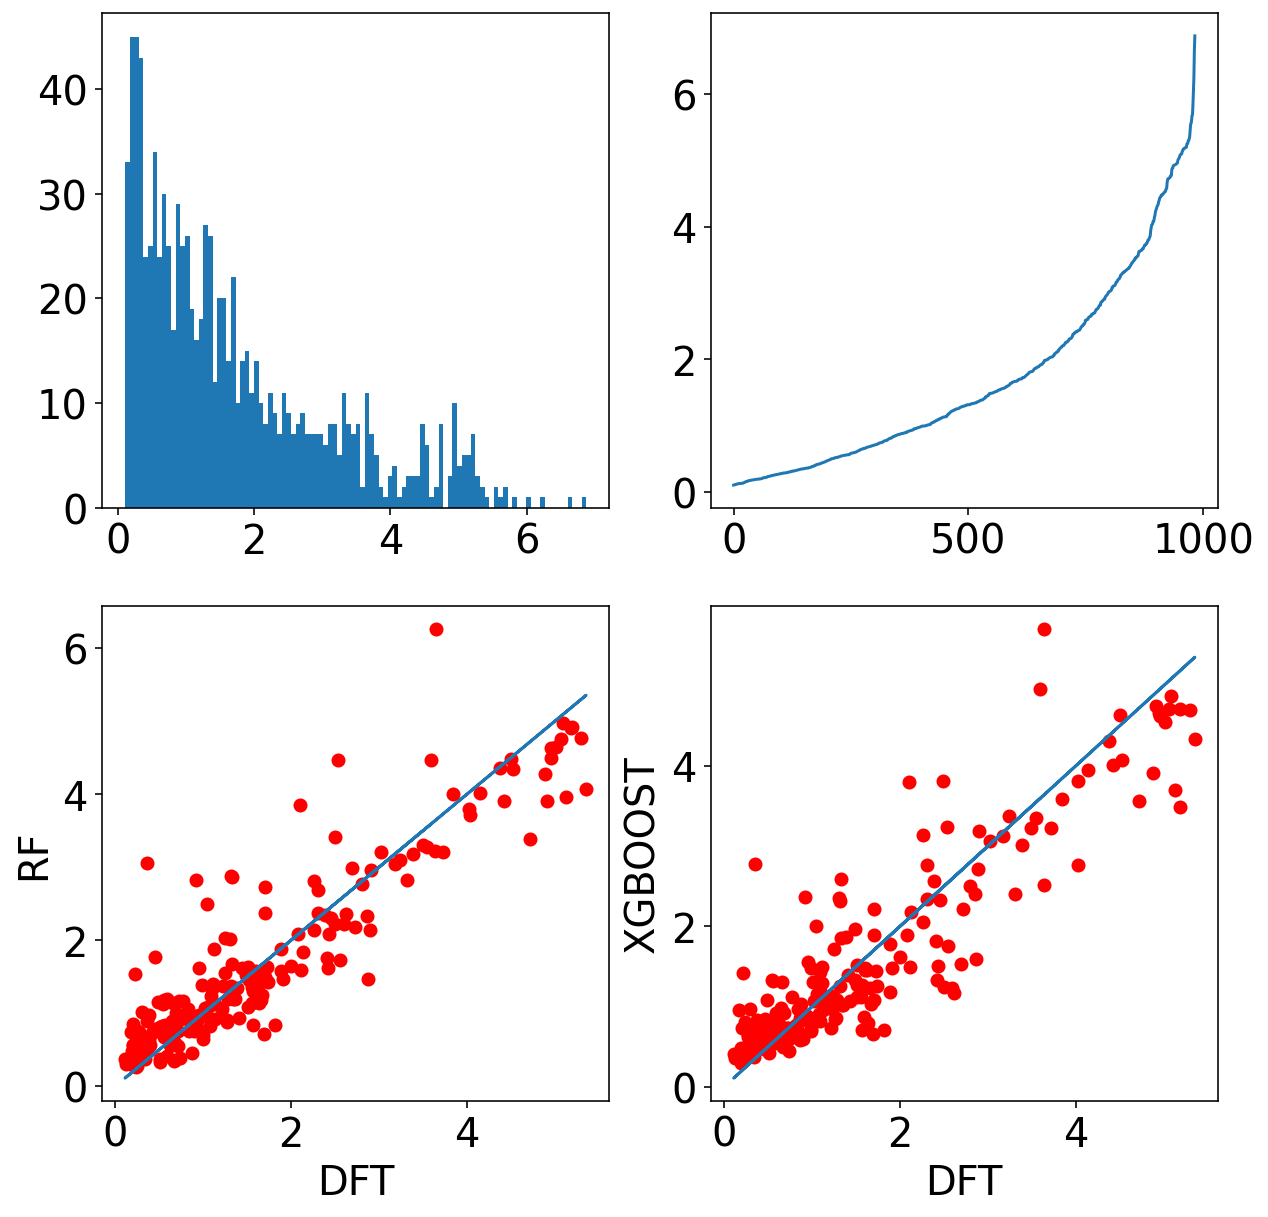

In [33]:
# How many do we have now?

print(len(band_gaps))

# Data visualization: let's have a look at our data.

plt.rcParams.update({'font.size': 20})

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.hist(band_gaps, bins=100)
# plt.savefig('Histogram_PDF_NoMetals', bbox_inches='tight')

band_gaps_sorted=sorted(band_gaps)

# Scatter plot
plt.subplot(2, 2, 2)
plt.plot(band_gaps_sorted)
plt.ylabel('')
plt.xlabel('')
# plt.savefig('ScatterPlot_NoMetals', bbox_inches='tight')



# This histogram shows that almost half of our data are metals (zero bandgap).

# Next, we create a pandas DataFrame object
a_parameters=np.array(a_parameters)
b_parameters=np.array(b_parameters)
c_parameters=np.array(c_parameters)
atomic_numbers=np.array(atomic_numbers).transpose()
distance_matrix=np.array(distance_matrix).transpose()
van_der_waals_radius=np.array(van_der_waals_radius).transpose()
electrical_resistivity=np.array(electrical_resistivity).transpose()
velocity_of_sound=np.array(velocity_of_sound).transpose()
reflectivity=np.array(reflectivity).transpose()
poissons_ratio=np.array(poissons_ratio).transpose()
molar_volume=np.array(molar_volume).transpose()
thermal_conductivity=np.array(thermal_conductivity).transpose()
melting_point=np.array(melting_point).transpose()
critical_temperature=np.array(critical_temperature).transpose()
superconduction_temperature=np.array(superconduction_temperature).transpose()
liquid_range=np.array(liquid_range).transpose()
bulk_modulus=np.array(bulk_modulus).transpose()
youngs_modulus=np.array(youngs_modulus).transpose()
brinell_hardness=np.array(brinell_hardness).transpose()
rigidity_modulus=np.array(rigidity_modulus).transpose()
vickers_hardness=np.array(vickers_hardness).transpose()
density_of_solid=np.array(density_of_solid).transpose()
coefficient_of_linear_thermal_expansion=np.array(coefficient_of_linear_thermal_expansion).transpose()
average_ionic_radius=np.array(average_ionic_radius).transpose()
average_cationic_radius=np.array(average_cationic_radius).transpose()
average_anionic_radius=np.array(average_anionic_radius).transpose()

dataset_df = pd.DataFrame({\
                           "mean_atomic_numbers": atomic_numbers[0],
                           "max_atomic_numbers": atomic_numbers[1],
                           "min_atomic_numbers": atomic_numbers[2],
                           "std_atomic_numbers": atomic_numbers[3],
                           "a_parameters": a_parameters,
                           "b_parameters": b_parameters,
                           "c_parameters": c_parameters,
                           "V":a_parameters*b_parameters*c_parameters,
                           "alpha_parameters": alpha_parameters,
                           "beta_parameters": beta_parameters,
                           "gamma_parameters": gamma_parameters,
                           "mean_distance_matrix": distance_matrix[0],
                           "max_distance_matrix": distance_matrix[1],
                           "min_distance_matrix": distance_matrix[2],
                           "std_distance_matrix": distance_matrix[3],
                           "mean_van_der_waals_radius":van_der_waals_radius[0],
                           "max_van_der_waals_radius":van_der_waals_radius[1],
                           "min_van_der_waals_radius":van_der_waals_radius[2],
                           "std_van_der_waals_radius":van_der_waals_radius[3],
                           "mean_electrical_resistivity":electrical_resistivity[0],
                           "max_electrical_resistivity":electrical_resistivity[1],
                           "min_electrical_resistivity":electrical_resistivity[2],
                           "std_electrical_resistivity":electrical_resistivity[3],
                           "mean_velocity_of_sound":velocity_of_sound[0],
                           "max_velocity_of_sound":velocity_of_sound[1],
                           "min_velocity_of_sound":velocity_of_sound[2],
                           "std_velocity_of_sound":velocity_of_sound[3],
                           "mean_reflectivity":reflectivity[0],
                           "max_reflectivity":reflectivity[1],
                           "min_reflectivity":reflectivity[2],
                           "std_reflectivity":reflectivity[3],
                           "mean_poissons_ratio":poissons_ratio[0],
                           "max_poissons_ratio":poissons_ratio[1],
                           "min_poissons_ratio":poissons_ratio[2],
                           "std_poissons_ratio":poissons_ratio[3],
                           "mean_molar_volume":molar_volume[0],
                           "max_molar_volume":molar_volume[1],
                           "min_molar_volume":molar_volume[2],
                           "std_molar_volume":molar_volume[3],
                           "mean_thermal_conductivity":thermal_conductivity[0],
                           "max_thermal_conductivity":thermal_conductivity[1],
                           "min_thermal_conductivity":thermal_conductivity[2],
                           "std_thermal_conductivity":thermal_conductivity[3],
                           "mean_melting_point":melting_point[0],
                           "max_melting_point":melting_point[1],
                           "min_melting_point":melting_point[2],
                           "std_melting_point":melting_point[3],
                           "mean_critical_temperature":critical_temperature[0],
                           "max_critical_temperature":critical_temperature[1],
                           "min_critical_temperature":critical_temperature[2],
                           "std_critical_temperature":critical_temperature[3],
                           "mean_superconduction_temperature":superconduction_temperature[0],
                           "max_superconduction_temperature":superconduction_temperature[1],
                           "min_superconduction_temperature":superconduction_temperature[2],
                           "std_superconduction_temperature":superconduction_temperature[3],
                           "mean_liquid_range":liquid_range[0],
                           "max_liquid_range":liquid_range[1],
                           "min_liquid_range":liquid_range[2],
                           "std_liquid_range":liquid_range[3],
                           "mean_bulk_modulus":bulk_modulus[0],
                           "max_bulk_modulus":bulk_modulus[1],
                           "min_bulk_modulus":bulk_modulus[2],
                           "std_bulk_modulus":bulk_modulus[3],
                           "mean_youngs_modulus":youngs_modulus[0],
                           "max_youngs_modulus":youngs_modulus[1],
                           "min_youngs_modulus":youngs_modulus[2],
                           "std_youngs_modulus":youngs_modulus[3],
                           "mean_brinell_hardness":brinell_hardness[0],
                           "max_brinell_hardness":brinell_hardness[1],
                           "min_brinell_hardness":brinell_hardness[2],
                           "std_brinell_hardness":brinell_hardness[3],
                           "mean_rigidity_modulus":rigidity_modulus[0],
                           "max_rigidity_modulus":rigidity_modulus[1],
                           "min_rigidity_modulus":rigidity_modulus[2],
                           "std_rigidity_modulus":rigidity_modulus[3],
                           "mean_vickers_hardness":vickers_hardness[0],
                           "max_vickers_hardness":vickers_hardness[1],
                           "min_vickers_hardness":vickers_hardness[2],
                           "std_vickers_hardness":vickers_hardness[3],
                           "mean_density_of_solid":density_of_solid[0],
                           "mean_coefficient_of_linear_thermal_expansion":coefficient_of_linear_thermal_expansion[0],
                           "mean_coefficient_of_linear_thermal_expansion":coefficient_of_linear_thermal_expansion[0],
                           "mean_coefficient_of_linear_thermal_expansion":coefficient_of_linear_thermal_expansion[0],
                           "mean_coefficient_of_linear_thermal_expansion":coefficient_of_linear_thermal_expansion[0],
                           "mean_average_ionic_radius":average_ionic_radius[0],
                           "max_average_ionic_radius":average_ionic_radius[1],
                           "min_average_ionic_radius":average_ionic_radius[2],
                           "std_average_ionic_radius":average_ionic_radius[3],
                           "mean_average_cationic_radius":average_cationic_radius[0],
                           "max_average_cationic_radius":average_cationic_radius[1],
                           "min_average_cationic_radius":average_cationic_radius[2],
                           "std_average_cationic_radius":average_cationic_radius[3],
                           "mean_average_anionic_radius":average_anionic_radius[0],
                           "max_average_anionic_radius":average_anionic_radius[1],
                           "min_average_anionic_radius":average_anionic_radius[2],
                           "std_average_anionic_radius":average_anionic_radius[3]
                           })


#
# for ci in dataset_df.columns:
#     t=dataset_df[ci]
#     dataset_df.insert(dataset_df.columns.to_list().index(ci),ci+"_2",t**2,True)
#     dataset_df.insert(dataset_df.columns.to_list().index(ci),ci+"_3",t**3,True)


# We need to normalize the data using a scaler
# Define the scaler
scaler = StandardScaler().fit(dataset_df)

# Scale the train set
scaled_dataset_df = scaler.transform(dataset_df)
# Then we do a 80/20 split of data: training set and test set

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    scaled_dataset_df, band_gaps, test_size=.2, random_state=None)

# It's machine learning time!

regr = RandomForestRegressor(n_estimators=300, max_depth=200, random_state=0)
regr.fit(X_train_scaled, y_train)
y_predicted = regr.predict(X_test_scaled)

print('RF MSE\t'+str(mean_squared_error(y_test, y_predicted))+'\n')
print('RF R2\t'+str(r2_score(y_test, y_predicted))+'\n')


xPlot=y_test
yPlot=y_predicted
plt.subplot(2, 2, 3)
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('RF')
plt.xlabel('DFT')
# plt.savefig('RF_Correlation_Test', bbox_inches='tight')


regr = XGBRegressor(objective='reg:linear', colsample_bytree=0.3, learning_rate=0.1,
                    max_depth=100, alpha=10, n_estimators=200)
regr.fit(X_train_scaled, y_train)
y_predicted = regr.predict(X_test_scaled)

print('XGBOOST MSE\t'+str(mean_squared_error(y_test, y_predicted))+'\n')
print('XGBOOST R2\t'+str(r2_score(y_test, y_predicted))+'\n')


xPlot=y_test
yPlot=y_predicted
plt.subplot(2, 2, 4)
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('XGBOOST')
plt.xlabel('DFT')
# plt.savefig('XGBOOST_Correlation_Test', bbox_inches='tight')